In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [21]:
data = pd.read_csv("./data/car_dataset.csv")
# "C:\Users\praka\krish_naik\simple_linear_regression\data\data.csv"

In [22]:
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
data.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
data.shape

(205, 26)

In [26]:
data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
data.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
data.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [31]:
data.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Now we can prepare the data for the linear reegression model.


In [34]:
new_df = data[['enginesize', 'price']]
new_df

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


<Axes: xlabel='enginesize', ylabel='price'>

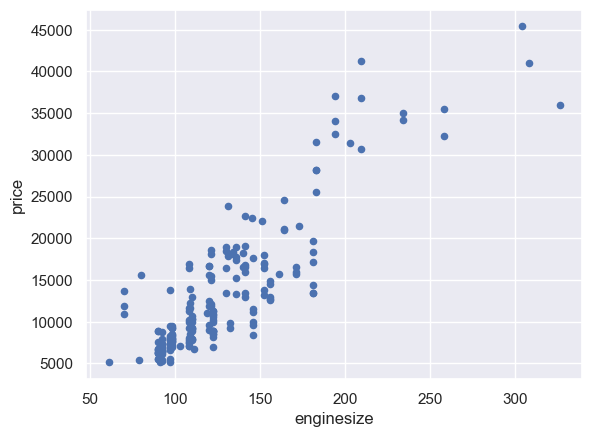

In [36]:
new_df.plot(x='enginesize', y='price', kind= 'scatter')

<Axes: xlabel='fueltypes', ylabel='price'>

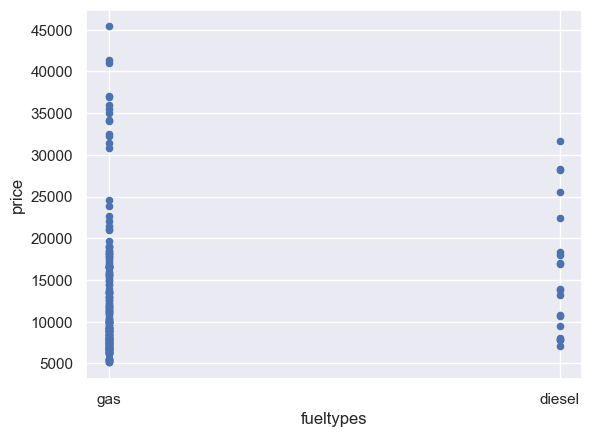

In [37]:
data.plot(x = 'fueltypes', y = 'price', kind='scatter')

In [38]:
x = new_df['enginesize']
y = new_df['price']

## Now Machine Learning

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [42]:
# Shapes of splitted data - sizes of the x_train and y_train should be the same, Also tests
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(164,)
(164,)
(41,)
(41,)


In [43]:
# Create a Linear regression model
model = LinearRegression()

In [44]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [45]:
model.coef_

array([164.31545172])

In [46]:
model.intercept_

-7613.370939489807

In [47]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [49]:
# Let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE -----> ", mse)

MSE ----->  16835544.038137678


In [50]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE -----> ", rmse )

RMSE ----->  4103.113944084136


In [51]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  3195.0312395000433


In [52]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.7825324721447275


In [53]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  16835544.038137678
RMSE -->  4103.113944084136
MAE -->  3195.0312395000433
R2 -->  0.7825324721447275


In [54]:
# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

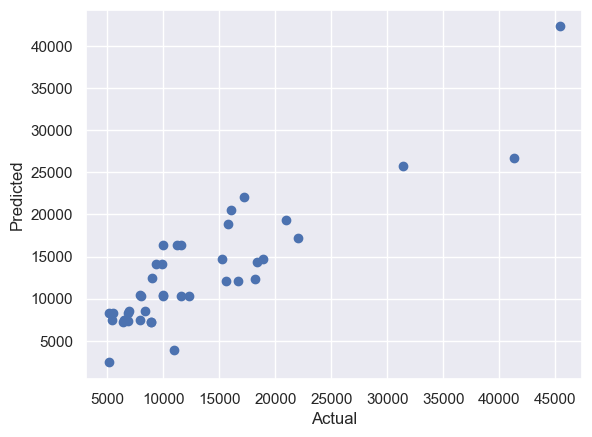

In [55]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='enginesize', ylabel='price'>

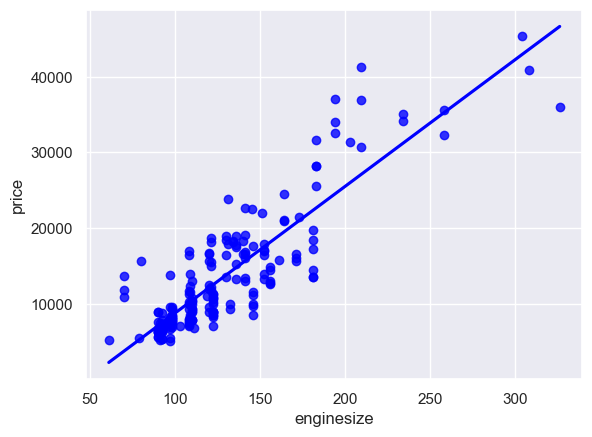

In [56]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

## What about other independent variables?

<Axes: xlabel='horsepower', ylabel='price'>

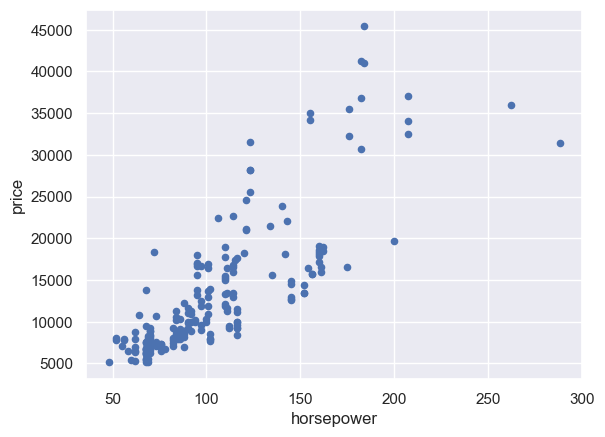

In [58]:
# plot horsepower - price distribution
data.plot(x='horsepower', y='price', kind='scatter')

In [59]:
# new x will be X1 and X2
x = data[['enginesize', 'horsepower']]
x

,enginesize,horsepower
0,130,111
1,130,111
2,152,154
3,109,102
4,136,115
...,...,...
200,141,114
201,141,160
202,173,134
203,145,106


In [60]:
# y will be same
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [61]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [62]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164, 2)
X_test: (41, 2)
Y_train: (164,)
Y_test: (41,)


In [63]:
# create a linear regression model
model = LinearRegression()

In [64]:
# train the model using training data
model.fit(x_train, y_train)  

LinearRegression()

In [65]:
# print coefficients
model.coef_

array([115.9909421,  64.2026329])

In [66]:
# print y_intercept | bias
model.intercept_

-8148.677422999768

In [67]:
# make predictions using test data
y_pred = model.predict(x_test)

In [68]:
# let's calculate the metrics
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [69]:
# print them all
print("MSE --> ", mse_2)
print("RMSE --> ", rmse_2)
print("MAE --> ", mae_2)
print("R2 --> ", r2_2)

MSE -->  15514797.066791015
RMSE -->  3938.882718080219
MAE -->  3061.6172627779783
R2 -->  0.7995927808659935


Text(0, 0.5, 'Predicted')

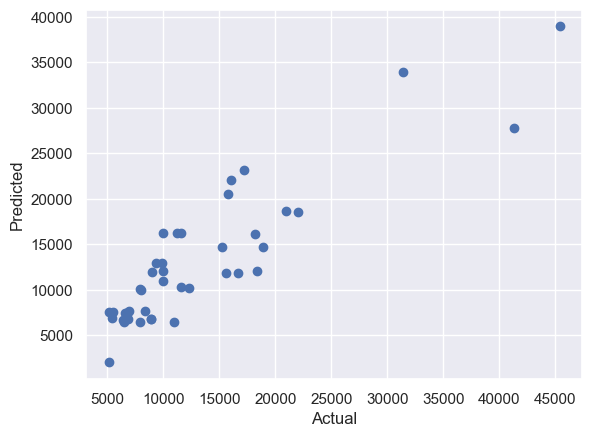

In [70]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

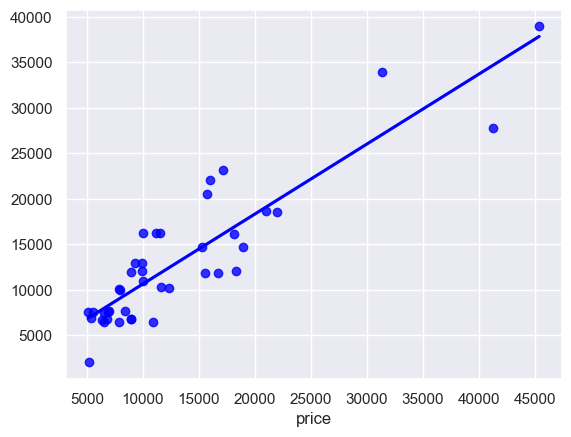

In [71]:

# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

## Let's compare the metrics of two models

In [72]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First', 'Second'],
    'MSE' : [mse, mse_2],
    'RMSE' : [rmse, rmse_2],
    'MAE' : [mae, mae_2],
    'R2' : [r2, r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

In [73]:
# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,1.683554e+07,4103.113944,3195.031240,0.782532
1,Second,1.551480e+07,3938.882718,3061.617263,0.799593


In [75]:
data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
data.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [76]:
columns = ['fueltypes','carbody','carwidth','carheight','price']

In [77]:
data1 = data[columns]

In [78]:
data1.head()

,fueltypes,carbody,carwidth,carheight,price
0,gas,convertible,64.1,48.8,13495.0
1,gas,convertible,64.1,48.8,16500.0
2,gas,hatchback,65.5,52.4,16500.0
3,gas,sedan,66.2,54.3,13950.0
4,gas,sedan,66.4,54.3,17450.0


In [84]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [82]:
num_features = ['carwidth','carheight']
cat_features = ['fueltypes','carbody']
tar_feature = ['price']

In [88]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [94]:
X = data1[['carwidth','carheight','fueltypes','carbody']]

In [114]:
data1.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [115]:
data1.fueltypes.unique()

array(['gas', 'diesel'], dtype=object)

In [96]:
X = preprocessor.fit_transform(X)

In [97]:
X.shape

(205, 9)

In [98]:
y = data1['price']

In [99]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((164, 9), (41, 9))

In [100]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [105]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4241.8140
- Mean Absolute Error: 2948.8404
- R2 Score: 0.6983
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6084.5219
- Mean Absolute Error: 3839.4099
- R2 Score: 0.5310


Lasso
Model performance for Training set
- Root Mean Squared Error: 4241.8242
- Mean Absolute Error: 2948.3577
- R2 Score: 0.6983
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6080.9469
- Mean Absolute Error: 3836.8614
- R2 Score: 0.5316


Ridge
Model performance for Training set
- Root Mean Squared Error: 4252.2602
- Mean Absolute Error: 2948.5071
- R2 Score: 0.6968
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5943.8194
- Mean Absolute Error: 3762.1266
- R2 Score: 0.5525


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3589.7580
- Mean Absolute Error: 2311.0665


In [106]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.736189
5,Random Forest Regressor,0.675211
6,XGBRegressor,0.665110
4,Decision Tree,0.555301
2,Ridge,0.552480
1,Lasso,0.531593
0,Linear Regression,0.531042
8,AdaBoost Regressor,0.498317
3,K-Neighbors Regressor,0.485537


## Catboosting Regressor

In [108]:
catboost_model = CatBoostRegressor(verbose=False)
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 73.62


### Plot y_pred and y_test

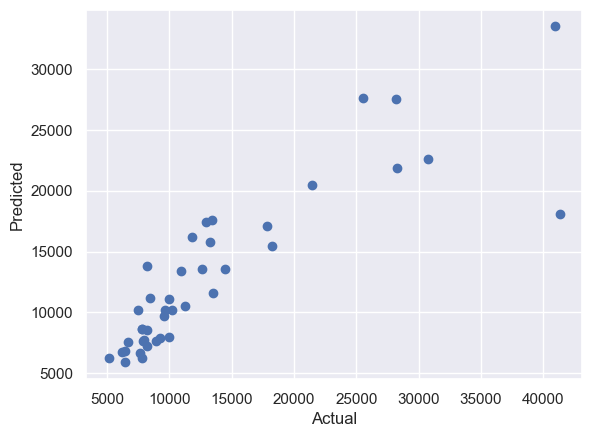

In [109]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

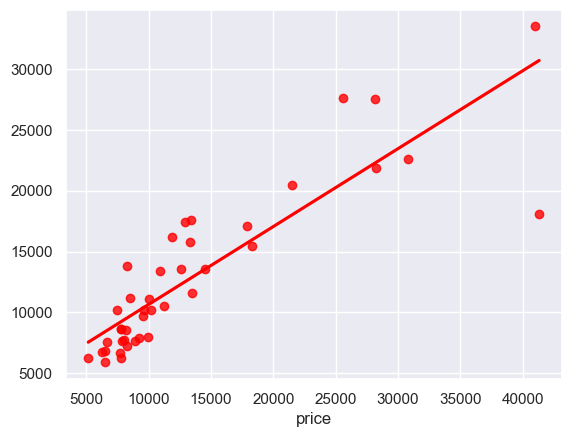

In [110]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [111]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,22589.816088,8170.183912
9,17859.167,17126.811249,732.355751
100,9549.000,9717.478599,-168.478599
132,11850.000,16165.272554,-4315.272554
68,28248.000,21865.689898,6382.310102
95,7799.000,6271.013571,1527.986429
159,7788.000,8625.086518,-837.086518
162,9258.000,7936.938164,1321.061836
147,10198.000,10178.975361,19.024639
182,7775.000,8633.135430,-858.135430
